# Làm mịn ảnh
Làm mịn ảnh, hay đơn giản là loại bỏ nhiễu, ta sẽ đi sử dụng quá trình lọc không gian bằng các bộ lọc trung bình, Gaussian và lọc trung vị (với trung vị ta thêm ít nhiễu muối tiêu để thử sức nó).

## Lọc trung bình (Averaging)

In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [28]:
img = cv2.imread('lenna.png')
blur_img5 = cv2.blur(img, ksize=(5, 5))
# another way: cv2.boxFilter
blur_img9 = cv2.blur(img, ksize=(9, 9))

## Gaussian 

In [29]:
gblur_img = cv2.GaussianBlur(img, (9, 9), 0)

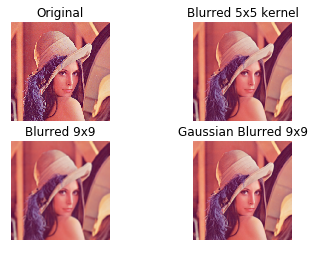

In [30]:
plt.subplot(221)
plt.title('Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.title('Blurred 5x5 kernel')
plt.axis('off')
plt.imshow(cv2.cvtColor(blur_img5, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.title('Blurred 9x9')
plt.axis('off')
plt.imshow(cv2.cvtColor(blur_img9, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.title('Gaussian Blurred 9x9')
plt.axis('off')
plt.imshow(cv2.cvtColor(gblur_img, cv2.COLOR_BGR2RGB))


plt.show()

Có thể thấy rắng khi ta tăng kích thước bộ lọc trung bìnhlên 9x9 thì nhiễu được giảm đi rất nhiều so với bộ 3x3, hay độ nhạy cảm với nhiễu càng giảm.
Lọc trung bình là lựa chọn cho giảm nhiễu ngẫu nhiên trong không gian. Tuy nhiên lọc trung bình là bộ lọc hiệu quả kém nhất với những vùng lặp lại. Gaussian khắc phục được điều này. 
Một điều khá thú vị là ta có thể cài đặt Gaussian bằng cách sử dụng Mean filter. Nếu lọc 4 lần ta sẽ có kết quả giống với bộ lọc Gaussian.
Gaussian nhân chập rất là chậm, tốn thời gian. Nếu mà dùng Median filter thêm tí đệ quy vào thì nhanh vô cùng.

Gaussian thì sẽ đánh trọng số các pixel so với pixel tâm nên là những pixel xa tâm sẽ trọng số thấp hơn và ít quan trọng hơn.
Lọc trung bình (median filter) thì sao? chỉ đơn giản là tính trung bình các giá trị pixel của tất cả các pixel. Điều này làm cho các pixel có trọng số như nhau. Ta có thể cải thiện bằng bộ lọc trung bình có trọng số.

## Lọc trung vị (Median Filtering)

Bộ lọc trung vị làm mịn tốt với ảnh có nhiễu muối tiêu
nên thêm tí muối tiêu vào ảnh gốc.

In [45]:
def adding_noise(img, prob): ## prob of noise: prob càng to, nhiễu càng nhiều
    output = np.zeros(img.shape, np.uint8)
    thres = 1 - prob
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = img[i][j]
    return output

In [46]:
added_noise_img = adding_noise(img, 0.03)

In [47]:
median = cv2.medianBlur(added_noise_img, 5)

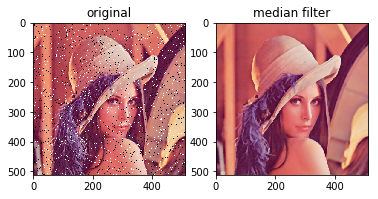

In [49]:
plt.subplot(121)
plt.title('original')
plt.imshow(cv2.cvtColor(added_noise_img, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.title('median filter')
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))

plt.show()

Kết quả trên quá tuyệt vời, bộ lọc trung vị hoạt động quá tốt với ảnh có nhiễu muối tiêu, về cơ bản, lọc trung vị là lọc phi tuyến tính. Nó sẽ lấy một pixel ở vị trí trung vị.